In [1]:
# import pertinent modules
import numpy as np
import pandas as pd
import time
from datetime import datetime
import copy
import matplotlib.pyplot as plt
import seaborn as sns

The Sallie Mae loan dataset for single family loans acquired in the 4th quarter of 2008 has just under 280k closed accounts with seven different closure reason codes. The vast majority of the accounts were closed through prepaid or early payoff of the loans. Closures classified as REO, real estate owned, are those in which the borrower(s) defaulted and were foreclosed by Fannie Mae. There is a belief that the REO closures have borrowers with initial credit scores on average that are lower than the borrowers who prepaid their accounts. The null hypothesis is that there is no difference between borrower credit scores that were foreclosed (REO loans) and those loans that were prepaid.

In [2]:
#import data previously saved from data wrangling exercise
df_import = pd.read_csv(r'C:\Users\Nikki\Temp\df.txt', sep = "|") 

#Google Drive Link
#https://drive.google.com/file/d/1SLtZIyWOzeRoI4onftNqkPq8pQMuinmX/view?usp=sharing

In [3]:
# Determine the number accounts that are currently open and those that are closed along with reason code for closure

# Total number of accounts
no_loans = len(df_import['Loan_ID'].value_counts())
# Number of closed accounts
df_closed = pd.DataFrame()
df_closed = copy.deepcopy(df_import[df_import['Zero_Balance_Code'].notna()])
no_closed = len(df_closed)
# Number of open accounts
no_open = no_loans - no_closed
print('There are ' + str(no_closed) + ' closed accounts and ' + str(no_open) + ' open accounts.')


There are 292705 closed accounts and 22291 open accounts.


In [4]:
# Group by and count number of borrowers and store in dictionary
status = df_import['Zero_Balance_Code'].value_counts().to_dict()
print(status)

{1.0: 279993, 9.0: 7022, 3.0: 2073, 6.0: 1879, 16.0: 635, 2.0: 602, 15.0: 501}


In [5]:
# Save Zero Balance Codes to a list for future use in bar chart
order = list(status.keys())
print(order)

[1.0, 9.0, 3.0, 6.0, 16.0, 2.0, 15.0]


In [6]:
# Reassign Zero Balance Codes to descriptive identifiers
status['prepaid'] = status.pop(1.0)
status['3rd party sale'] = status.pop(2.0)
status['short sale'] = status.pop(3.0)
status['repurchased'] = status.pop(6.0)
status['REO'] = status.pop(9.0)
status['note sale'] = status.pop(15.0)
status['reperformance'] = status.pop(16.0)

# Check reassigned keys in dictionary
status

{'prepaid': 279993,
 '3rd party sale': 602,
 'short sale': 2073,
 'repurchased': 1879,
 'REO': 7022,
 'note sale': 501,
 'reperformance': 635}

In [7]:
# Sort dictionary by values in decreasing order, store keys in dictionary to be later used in boxplot
status_sorted = sorted(status.items(), key=lambda x: x[1])
ylabels = sorted(status.items(), key=lambda x: x[1], reverse=True)

In [8]:
# Create DataFrame for each of three of the Zero Balance Codes
df_prepaid = df_closed[(df_closed['Zero_Balance_Code'] == 1)]
df_reo = df_closed[(df_closed['Zero_Balance_Code'] == 9)]

In [20]:
# Descriptive summary statitics of closed accounts
pop_std = np.std(df_closed.Borrower_Credit_Score)
print('Closed accounts standard deviation is:', pop_std)
pop_median = np.median(df_closed.Borrower_Credit_Score)
print('Closed accounts median is:',pop_median)
pop_mean = np.mean(df_closed.Borrower_Credit_Score)
print('Closed accounts mean is:',pop_mean)

Closed accounts standard deviation is: 48.84120717760842
Closed accounts median is: 761.0
Closed accounts mean is: 749.3492594933465


In [21]:
# Descriptive summary statistics of prepaid accounts
pop_std = np.std(df_prepaid.Borrower_Credit_Score)
print('Prepaid standard deviation is:', pop_std)
pop_median = np.median(df_prepaid.Borrower_Credit_Score)
print('Prepaid median is:',pop_median)
pop_mean = np.mean(df_prepaid.Borrower_Credit_Score)
print('Prepaid mean is:',pop_mean)

Prepaid standard deviation is: 47.884094782920116
Prepaid median is: 763.0
Prepaid mean is: 751.1224602043623


In [22]:
# Descriptive summary statistics of REO accounts
pop_std = np.std(df_reo.Borrower_Credit_Score)
print('REO standard deviation is:', pop_std)
pop_median = np.median(df_reo.Borrower_Credit_Score)
print('REO median is:',pop_median)
pop_mean = np.mean(df_reo.Borrower_Credit_Score)
print('REO mean is:',pop_mean)

REO standard deviation is: 52.917908783472654
REO median is: 710.0
REO mean is: 708.9077185986898


This distribution in the figure above of REO loans (those that have gone through foreclosure) is left skewed with more values less than the mean.

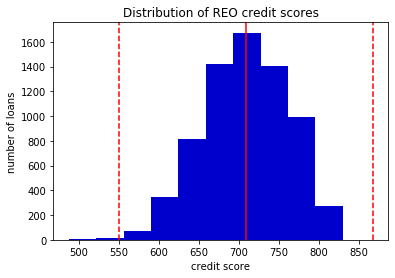

In [12]:
# Plot of distribution of borrower credit scores of REO loans
_ = plt.hist(df_reo['Borrower_Credit_Score'], color='mediumblue')
_ = plt.xlabel('credit score')
_ = plt.ylabel('number of loans')
_ = plt.title('Distribution of REO credit scores')
_ = plt.axvline(pop_mean, color='r')
_ = plt.axvline(pop_mean + 3 * pop_std, color='r', linestyle='--')
_ = plt.axvline(pop_mean - 3 * pop_std, color='r', linestyle='--')

Bootstrapping will be used to compare the difference between REO loans and those that were prepaid.

In [13]:
# Create function that randomly samples with replacement 
def bootstrap_replicate(data, func):
    """Select random sample without replacement and apply designated function on sample"""
    bs_sample = np.random.choice(data, size=len(data))
    return func(bs_sample)

In [14]:
# Loop through 10,000 times and find the difference between mean of loans that were prepaid and those that foreclosed
size = 10000
bs_delta = np.empty(size)
for i in range(size):
    reo_loans = bootstrap_replicate(df_reo.Borrower_Credit_Score, np.mean)
    prepaid_loans = bootstrap_replicate(df_prepaid.Borrower_Credit_Score, np.mean)
    bs_delta[i] = prepaid_loans - reo_loans
lower_limit, upper_limit = np.percentile(bs_delta,[2.5, 97.5])
print('The 2.5 percentile of the difference between prepaid mean and REO mean is', lower_limit)
print('The 97.5 percentile of the difference between prepaid mean and REO mean is', upper_limit)
print('Array of sampling of the difference between prepaid mean and REO mean is', bs_delta)

The 2.5 percentile of the difference between prepaid mean and REO mean is 40.97001997119346
The 97.5 percentile of the difference between prepaid mean and REO mean is 43.48122349525717
Array of sampling of the difference between prepaid mean and REO mean is [42.45383054 43.01192334 43.27517894 ... 42.10085414 42.16101071
 42.02547022]


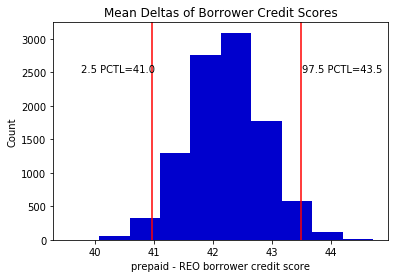

In [15]:
# Plot samples of prepaid - REO borrower credit scores in histgram and include percentiles
plt.hist(bs_delta, color='mediumblue')
plt.axvline(x=lower_limit, color='red')
plt.axvline(x=upper_limit, color='red')
plt.xlabel('prepaid - REO borrower credit score')
plt.ylabel('Count')
plt.title('Mean Deltas of Borrower Credit Scores')
plt.text(lower_limit-1.2, 2500, '2.5 PCTL=' + str(round(lower_limit,1)))
plt.text(upper_limit+.02, 2500, '97.5 PCTL=' + str(round(upper_limit,1)))
plt.show()

In [16]:
# Combine and permute two datasets
def permutation_sample(data1, data2, func):
    """Generate a permutation sample from the two datasets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    diff = func(perm_sample_1, perm_sample_2)

    return diff

In [17]:
# Take difference of means between two datasets 
def diff_of_mean(perm_sample_1, perm_sample_2):
    """Difference of mean of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(perm_sample_1) - np.mean(perm_sample_2)
    
    return diff

In [18]:
# Loop through and find the delta between prepaid borrowers credit score and REO credit scores
perm_replicates = np.empty(size)
reo_data = np.array(df_reo.Borrower_Credit_Score) 

for i in range(size):
    perm_replicates[i] = permutation_sample(
        reo_data, np.random.choice(np.array(df_prepaid.Borrower_Credit_Score), 
                                   len(reo_data)), diff_of_mean)
print(perm_replicates)

[ 0.06892623 -0.3422102  -0.49473085 ...  0.25761891  0.27912276
  1.43961834]


In [19]:
# Determine p-value for null hypothesis
p = np.sum(abs(perm_replicates) >= np.mean(bs_delta)) / len(perm_replicates)
p

0.0

The null hypothesis that there is no difference between borrower credit scores and those that were foreclosed (REO loans) is rejected since the p-value is zero which is <.05.